In [1]:
cd '/content/drive/My Drive/Subjects/AIT 582 - Applications of Metadata in Complex Big Data Problems/Project'

/content/drive/My Drive/Subjects/AIT 582 - Applications of Metadata in Complex Big Data Problems/Project


In [0]:
!pip install pmdarima

In [0]:
import pandas as pd
import seaborn as sns, numpy as np
from scipy.stats import spearmanr, pearsonr
import pmdarima as pm

In [0]:
df = pd.read_csv('processed_dataset_grids.csv')

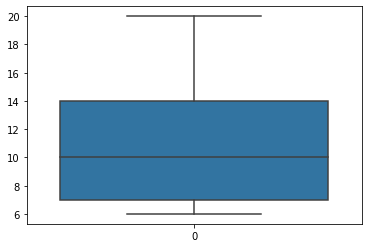

In [5]:
counts = df[df.State=='CA'].groupby('grid_1000m').size().sort_values(ascending=False)

ax = sns.boxplot(data=counts[(counts > 5) & (counts <= 20)])

In [14]:
# select the cell with max number of accidents from CA
df[df.State=='CA'].groupby('grid_1000m').size().sort_values(ascending=False)

grid_1000m
11S LT  98 56    437
11S LT  84 69    370
11S LT  64 80    368
11S LT  91 64    341
10S EG  55 84    315
                ... 
10T DK  90 71      1
10T DK  89 89      1
10T DK  85 83      1
10T DK  84 89      1
10S DH  51 93      1
Length: 15988, dtype: int64

Start_Time
(2019, 12, 21)    9
(2019, 12, 4)     9
(2019, 11, 11)    9
(2019, 12, 19)    9
(2019, 12, 23)    7
                 ..
(2019, 6, 21)     1
(2019, 6, 23)     1
(2019, 6, 24)     1
(2019, 6, 28)     1
(2019, 8, 1)      1
Length: 203, dtype: int64


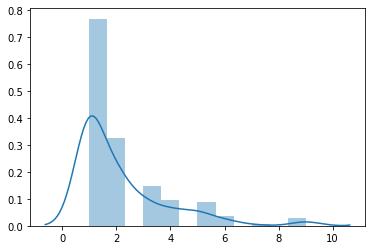

In [15]:
# Accodents per day of the grid cell with maximum number of accident records
freq = df[df.grid_1000m=='11S LT  98 56'].sort_values(by='Start_Time') \
  .groupby(by=[pd.to_datetime(df.Start_Time) \
  .map(lambda x : (x.year, x.month, x.day))]) \
  .size() \
  .sort_values(ascending=False)
print(freq)
ax = sns.distplot(freq)

In [0]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [11]:
temp_df = df[df.grid_1000m=='11S LT  98 56'].sort_values(by='Start_Time').Severity.to_frame().reset_index(drop=True).values

data, labels = univariate_data(temp_df, 0, len(temp_df) - 1, 5, 1)

print(temp_df.shape)
print(data.shape)
print(labels.shape)

(437, 1)
(431, 5, 1)
(431, 1)


In [0]:
for i in range(5):
  corr = spearmanr(data[:, i, :].flatten(), labels.flatten())
  print(corr)

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import altair as alt

In [0]:
df.info()

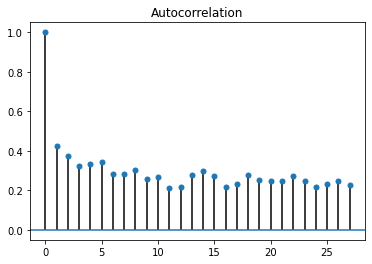

In [24]:
# Create an array like you would in R
x = pm.c(*df[df.grid_1000m=='11S LT  98 56'].sort_values(by='Start_Time').Severity)

# Compute an auto-correlation like you would in R:
pm.acf(x)

# Plot an auto-correlation:
pm.plot_acf(x)

In [0]:
import tqdm

In [0]:
for state in ['CA', 'TX', 'SC', 'FL', 'NC']:
  df_state = df[df.State==state]
  for grid_idx in tqdm.tqdm(set(df_state.grid_1000m)):
    var = df_state[df_state.grid_1000m == grid_idx].Severity.tolist()
    var_1 = [0] + var[:-1]
    var_2 = [0, 0] + var[:-2]
    var_3 = [0, 0, 0] + var[:-3]
    df_state.loc[df_state[df_state.grid_1000m == grid_idx].index, 'previous_1'] = var_1[:len(var)]
    df_state.loc[df_state[df_state.grid_1000m == grid_idx].index, 'previous_2'] = var_2[:len(var)]
    df_state.loc[df_state[df_state.grid_1000m == grid_idx].index, 'previous_3'] = var_3[:len(var)]
  df_state.to_csv(f'output/accident_data_{state}.csv')